Only Benefits
Boundary  65 30 [0. 0.] [10687.5279489     0.       ] [100000.      0.]
Stop: 30.00000000000555 [39727.49230069     0.        ]
n : 100 len xT 3501
Only Premium
Boundary  65 30 [0. 0.] [0. 0.] [0. 0.]
Stop: 30.00000000000555 [-13087.71193466      0.        ]
n : 100 len xT 3501
Required Premium -3035.4803420970975
Boundary  65 30 [0. 0.] [10687.5279489     0.       ] [100000.      0.]
Stop: 30.00000000000555 [0.00447726 0.        ]
n : 100 len xT 3501
     Age    Single Pr.       Prem PV     Math Res.  
65           100000.00          0.00     100000.00  
64            98069.19       -650.63      96094.20  
63            96110.56      -1271.26      92251.66  
62            94131.10      -1864.59      88471.18  
61            92137.13      -2432.94      84752.00  
60            90134.33      -2978.32      81093.70  
59            88127.84      -3502.48      77496.14  
58            86122.32      -4006.93      73959.35  
57            84121.96      -4493.01      70483.51  


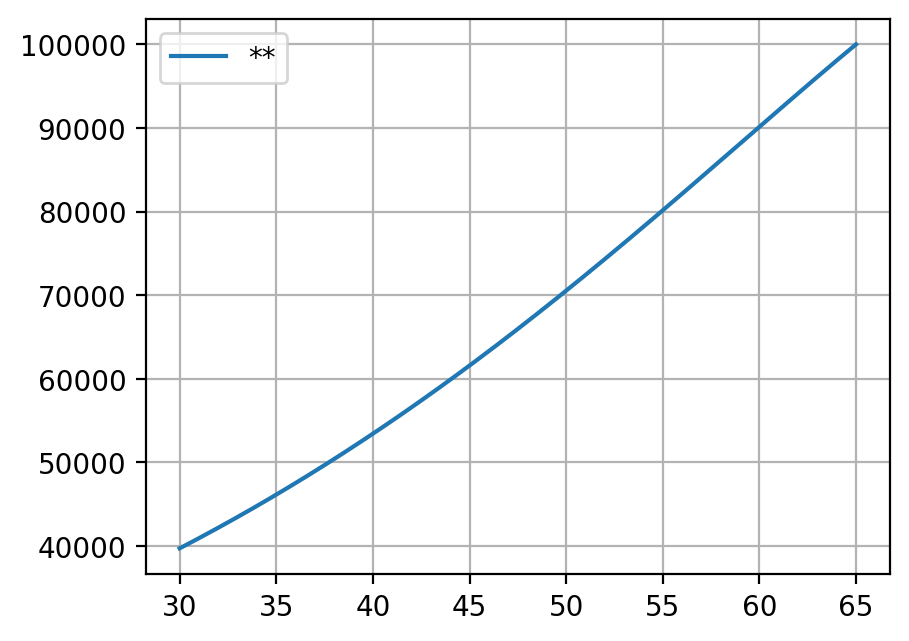

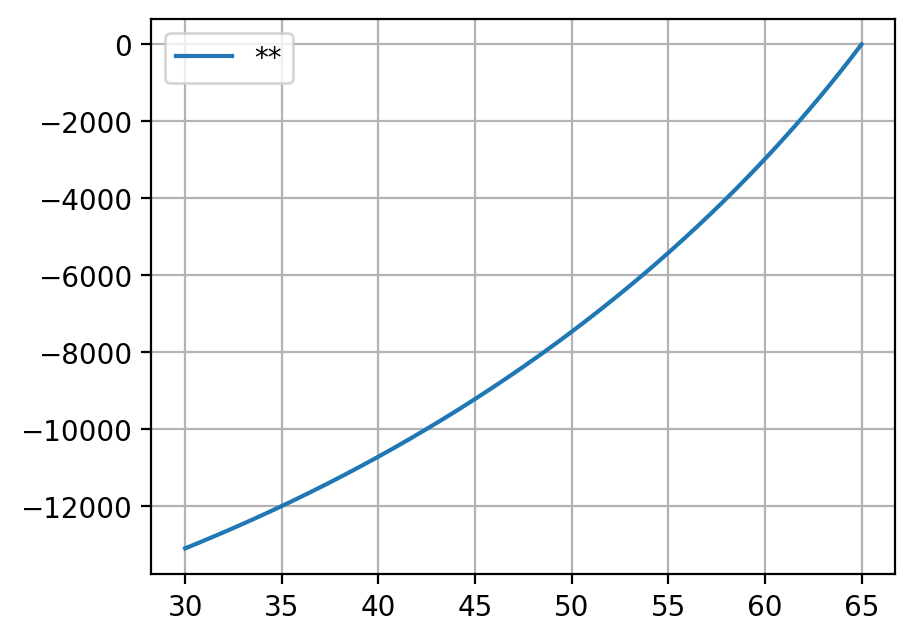

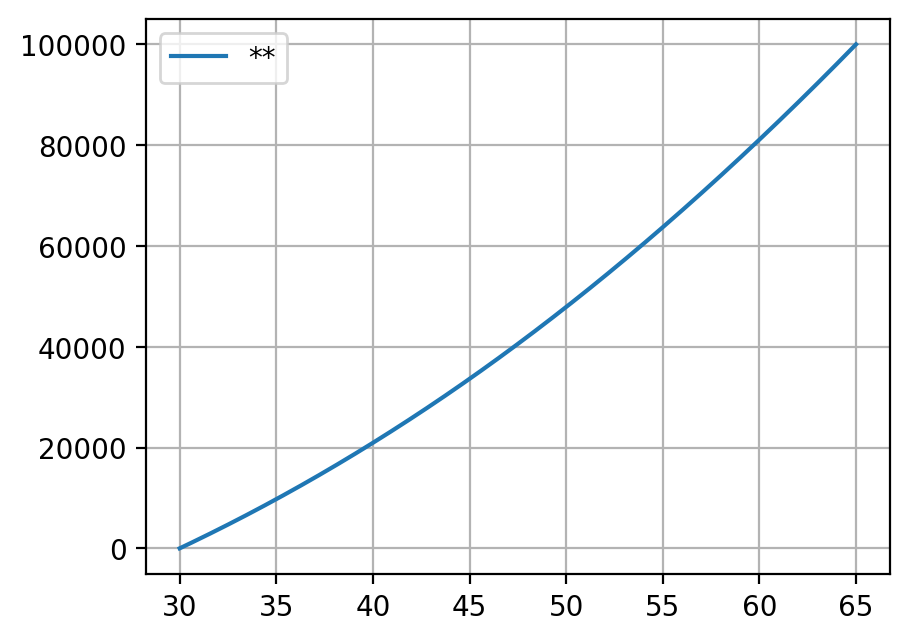

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rkstep(f,t,y,deltat):
    k=deltat * f(t,y)
    ktot= k
    k=deltat * f(t+deltat/2.,y+k/2.)
    ktot+=k
    k=deltat * f(t+deltat/2.,y+k/2.)
    ktot+=k
    k=deltat * f(t+deltat,y+k)
    ktot+=k
    ynext = y + 1./6 * ktot
    return(ynext)

def rkstep2(f,t,y,deltat):
    k=[]
    k.append(deltat * f(t,y))
    k.append(deltat * f(t+deltat/2.,y+k[0]/2.))
    k.append(deltat * f(t+deltat/2.,y+k[1]/2.))
    k.append(deltat * f(t+deltat,y+k[2]))
    ynext = y + 1./6 * sum(k)
    return(ynext)

def rk(f,y0,t0,t1,dt,eps=0.001):
        print("Boundary ",t0,t1, y1,y0,y0*1.035**65)
        xvect=[]
        yvect=[]
        t=t0
        y=y0
        if dt<0:
            xvect.append(t)
            yvect.append(y)
            while(t>t1+eps):
                
                y = rkstep2(f,t,y,dt)
                t += dt
                xvect.append(t)
                yvect.append(y)
                #print("Trace ",t,y)
                #print("Shape NP x",np.shape(xvect)," NP y",np.shape(yvect))
        else:
            xvect.append(t)
            yvect.append(y)	
            while(t<t1-eps):
                
                y = rkstep2(f,t,y,dt)
                t += dt
                xvect.append(t)
                yvect.append(y)
        #print("Shape NP x",np.shape(xvect)," NP y",np.shape(yvect))
        return(xvect,yvect) 

def plotrk(f,y0,t0,t1,dt,legend=None,fignr=1,irate = 0.035,bTrace=False):
    x,y = rk(f,y0,t0,t1,dt)
    #print(np.shape(x), np.shape(y))
    #stop
    xT=[]
    yT=[]
    for i in range(len(x)):
          if bTrace:
                print("Trace ",x[i],y[i])
          y[i][0] *= (1+irate)**(x[i])
          xT.append(x[i])
          yT.append(y[i][0])
          if bTrace:
                print(".... ",(1+irate)**(x[i]),y[i])
    plt.figure(fignr)
    plt.plot(xT,yT)
    plt.grid(True)
    if legend:
        plt.legend(legend)
    print("Stop:", x[-1],y[-1])
    n = int(1./abs(dt)+0.0001)
    print("n :",n, "len xT",len(xT))
    xRet =[]
    yRet =[]
    for i in range(len(xT)):
        if i%n == 0:
            #print("** ",i)
            xRet.append(int(0.001+xT[i]))
            yRet.append(yT[i])
    return(xRet,yRet)
    
def f1(t,x):
    return(np.array([x[0],t]))

def mu(t):
    return(0.0005+10**(0.038*t-4.12))

def sigma(t):
    return(0.0004+10**(0.06*t-5.46))
	

def fMortalitaet(t,x,irate=0.035,c=0,b=200000,bPrint=False):
    w=[]
    mut = mu(t)
    if bPrint and abs(t - int(t)) < 0.0005:
        print(int(t),x[0],mut)
    w.append((1+irate)**(-t)*(c - mut*b)+mut*x[0]-mut*x[1])
    w.append(0)
    return(np.array(w))

def fPrem(t,x,v=1./1.035,c=1000,b=0):
    return(fMortalitaet(t,x,c=c,b=b))

t0=65
t1=30
dt=-0.01
y0=np.array([100000.*(1.035)**(-t0),0])
y1=np.array([0.,0.])
legend=["**","*t",]

print("Only Benefits")

x1,y11 = plotrk(fMortalitaet,y0,t0,t1,dt,legend=legend,fignr=1)

print("Only Premium")

x2,y12 = plotrk(fPrem,y1,t0,t1,dt,legend=legend,fignr=2)

PP =  39727.49230069 / -13087.71193466*1000

print ("Required Premium", PP)

def fTot(t,x,c=3035.48,b=200000.):
    return(fMortalitaet(t,x,c=c,b=b))

y0=np.array([100000.*(1.035)**(-t0),0])

x3,y13= plotrk(fTot,y0,t0,t1,dt,legend=legend,fignr=3)


strTemp = "%8s  %12s  %12s  %12s  \n"%("Age","Single Pr.","Prem PV","Math Res.")
for i in range(len(x1)):
    strTemp += "%-8d  %12.2f  %12.2f  %12.2f  \n"%(x1[i],y11[i],y12[i],y13[i])
    
print(strTemp)
